## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =7,5
rcParams['font.size'] = 11.0
from matplotlib import font_manager as fm
import sklearn.feature_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Loading Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes[df.dtypes=='object']

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

In [8]:
print('Column_Name  Count   %')
for attribute in df.columns:
    if(attribute!='SeniorCitizen' and attribute!='tenure' and attribute!='MonthlyCharges'):
        if((df.loc[df[attribute] == ' ']['customerID'].count())>=1):
            print(attribute+" ",df.loc[df[attribute] == ' ']['customerID'].count(),\
                  " ",((df.loc[df[attribute] == ' ']['customerID'].count())/len(df))*100)

Column_Name  Count   %
TotalCharges  11   0.1561834445548772


In [9]:
df['TotalCharges'].replace(" ",np.nan,inplace=True)
df.dropna(inplace=True)

In [10]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [11]:
for attribute in df.columns:
    if(attribute!='TotalCharges' and attribute!='tenure' and attribute!='MonthlyCharges' and attribute!='customerID'):
        print(attribute)
        print(df[attribute].unique())

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


In [12]:
df.drop(columns={'customerID'},inplace=True)

## Visualizing the existing Data

/Users/neerajpadarthi/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


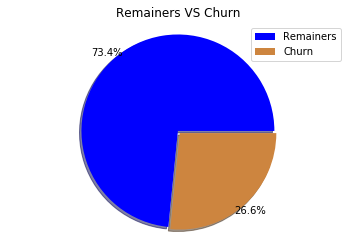

In [13]:
performance = [df[df['Churn'] == 'No']['Churn'].count(),\
               df[df['Churn'] == 'Yes']['Churn'].count()]

colors_list = ['b', 'peru']
explode_list = [0.03, 0] 


plt.pie([float(v) for v in performance],autopct='%1.1f%%',pctdistance=1.09,
         colors=colors_list,shadow=True,explode=explode_list)


plt.title('Remainers VS Churn', y=1) 


plt.legend(labels=['Remainers','Churn'], loc='left') 
plt.axis('Equal') 
plt.show()

## Correlation for Quantitative Features 

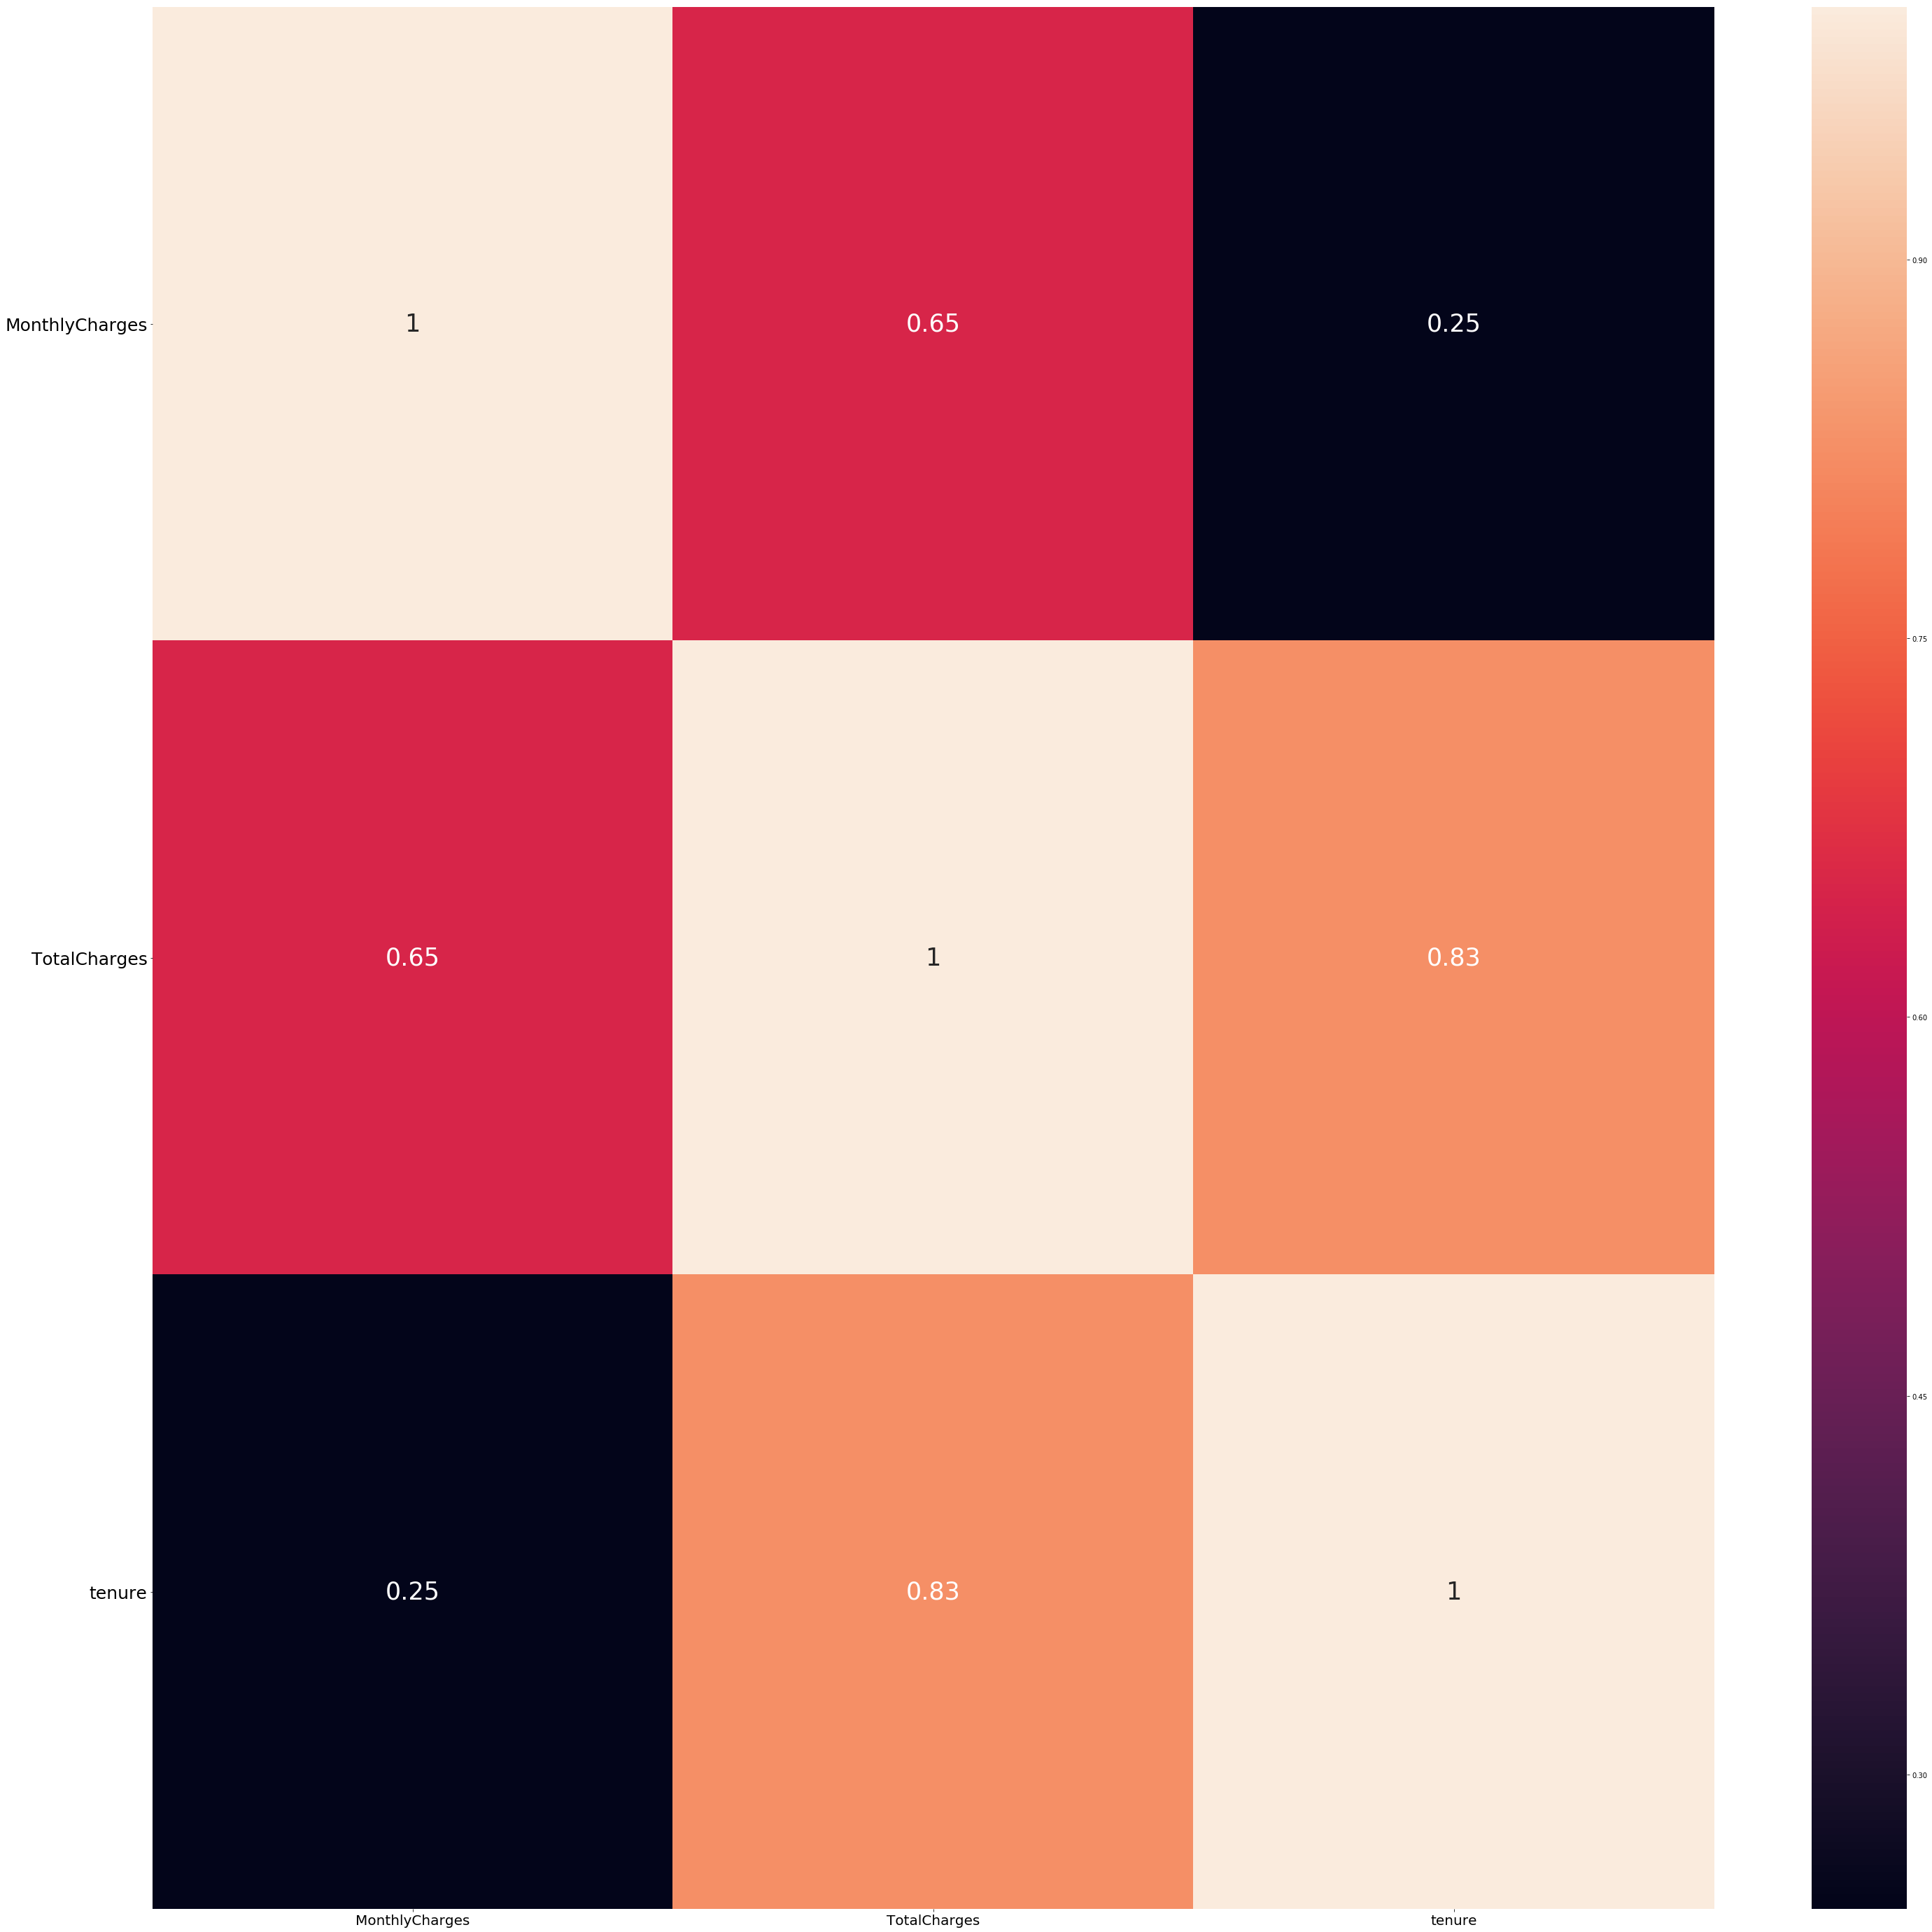

In [14]:
corr = df[['MonthlyCharges','TotalCharges','tenure']].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':35})
heat_map=plt.gcf()
heat_map.set_size_inches(50,50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.show()

In [15]:
df.drop(columns={'TotalCharges'},inplace=True)

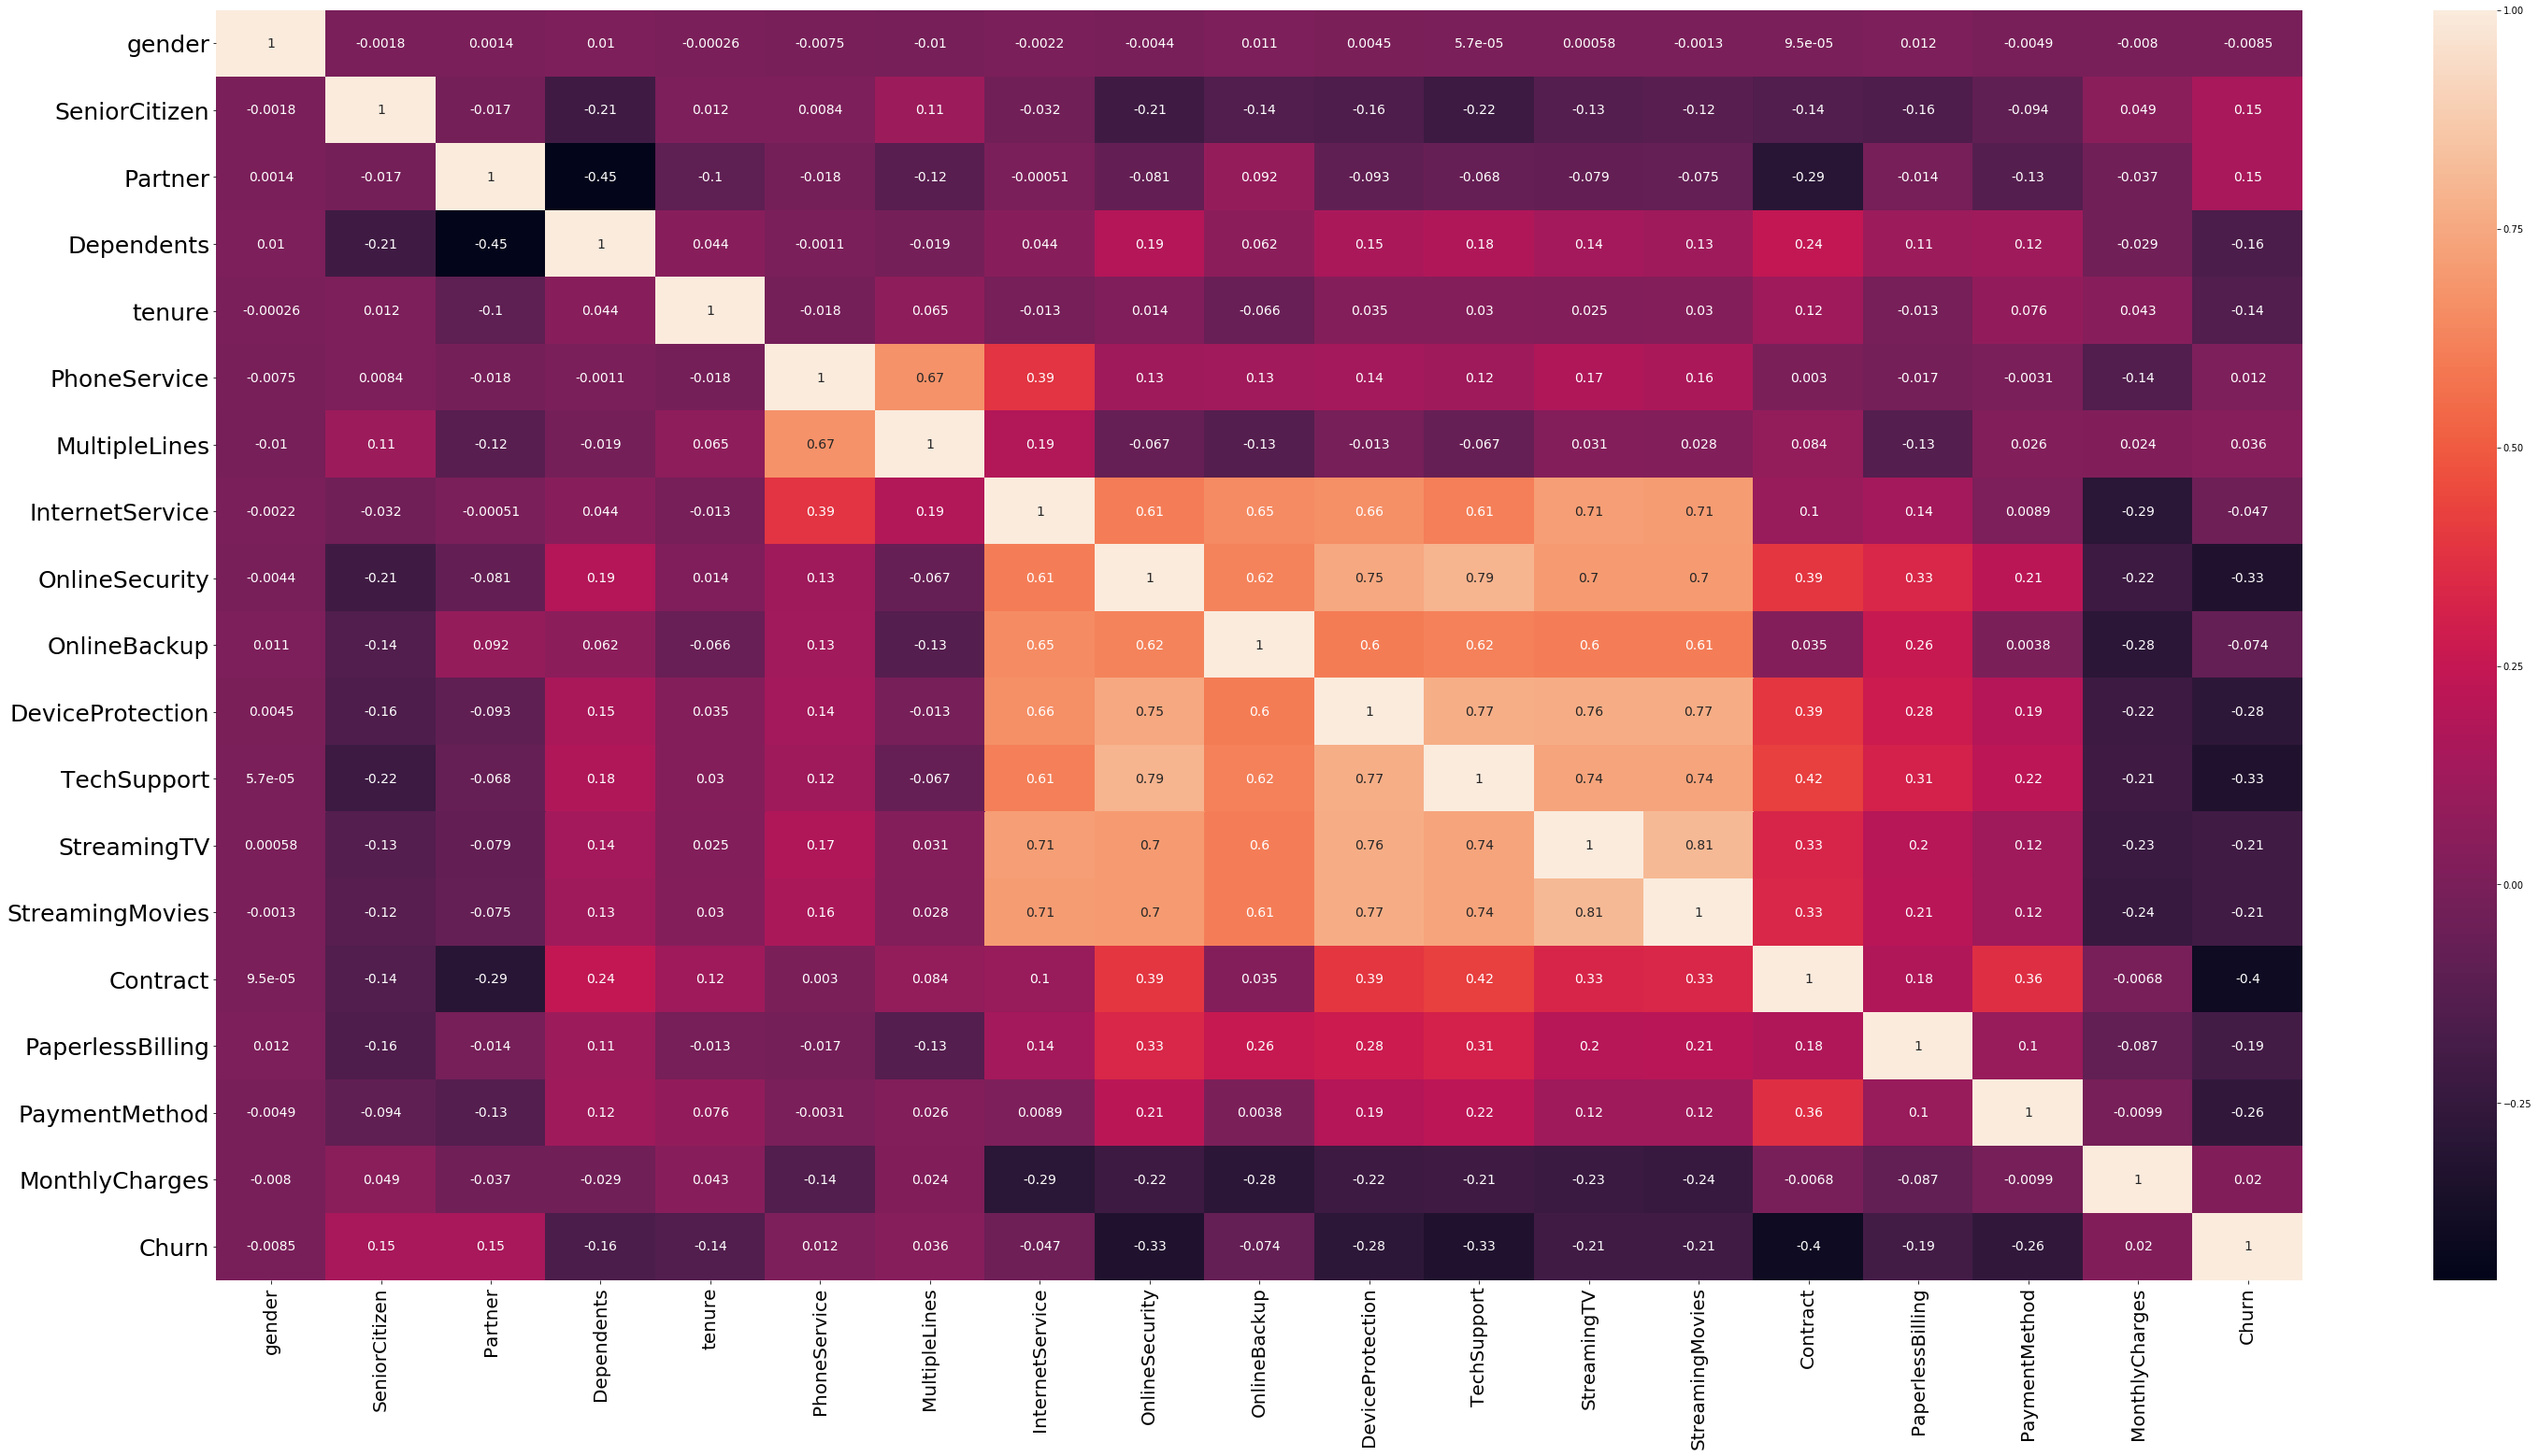

In [20]:
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':14})
heat_map=plt.gcf()
heat_map.set_size_inches(50,25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.show()

In [17]:
telcom_df =  df.iloc[:,:19]

In [18]:
telcom_df['Churn']=telcom_df.Churn.apply(lambda x: 1 if x=='Yes' else 0)
telcom_df['gender']=telcom_df.gender.apply(lambda x: 1 if x=='Male' else 0)
telcom_df['Partner']=telcom_df.Partner.apply(lambda x: 1 if x=='Yes' else 0)
telcom_df['Dependents']=telcom_df.Dependents.apply(lambda x: 1 if x=='Yes' else 0)
telcom_df['PhoneService']=telcom_df.PhoneService.apply(lambda x: 1 if x=='Yes' else 0)
telcom_df['PaperlessBilling']=telcom_df.PaperlessBilling.apply(lambda x: 1 if x=='Yes' else 0)

In [19]:
telcom_df =pd.get_dummies(data = telcom_df,columns = [
'MultipleLines',       
'InternetService',     
'OnlineSecurity',     
'OnlineBackup',        
'DeviceProtection',    
'TechSupport',         
'StreamingTV',         
'StreamingMovies',     
'Contract',            
'PaymentMethod'],dtype=np.int32 )

In [20]:
telcom_df['churn']= telcom_df['Churn']
telcom_df.drop(columns={'Churn'},inplace=True)

In [21]:
telcom_df.drop(columns={'MultipleLines_No phone service','OnlineSecurity_No internet service'\
                   ,'OnlineBackup_No internet service','DeviceProtection_No internet service'\
                   ,'TechSupport_No internet service','StreamingTV_No internet service'\
                  ,'StreamingMovies_No internet service'},inplace=True)

In [22]:
len(telcom_df.columns)

33

In [23]:
for x in telcom_df.columns:
    if(x!='customerID' and x!='MonthlyCharges' and x!='tenure'):
        print(x,sorted(telcom_df[x].unique()))

gender [0, 1]
SeniorCitizen [0, 1]
Partner [0, 1]
Dependents [0, 1]
PhoneService [0, 1]
PaperlessBilling [0, 1]
MultipleLines_No [0, 1]
MultipleLines_Yes [0, 1]
InternetService_DSL [0, 1]
InternetService_Fiber optic [0, 1]
InternetService_No [0, 1]
OnlineSecurity_No [0, 1]
OnlineSecurity_Yes [0, 1]
OnlineBackup_No [0, 1]
OnlineBackup_Yes [0, 1]
DeviceProtection_No [0, 1]
DeviceProtection_Yes [0, 1]
TechSupport_No [0, 1]
TechSupport_Yes [0, 1]
StreamingTV_No [0, 1]
StreamingTV_Yes [0, 1]
StreamingMovies_No [0, 1]
StreamingMovies_Yes [0, 1]
Contract_Month-to-month [0, 1]
Contract_One year [0, 1]
Contract_Two year [0, 1]
PaymentMethod_Bank transfer (automatic) [0, 1]
PaymentMethod_Credit card (automatic) [0, 1]
PaymentMethod_Electronic check [0, 1]
PaymentMethod_Mailed check [0, 1]
churn [0, 1]


 ## Normalizing the Data

In [24]:
telcom_df = (telcom_df-np.min(telcom_df))/(np.max(telcom_df)-np.min(telcom_df)).values

In [25]:
telcom_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn
0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.098592,1.0,1.0,0.809950,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.295775,1.0,1.0,0.704975,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.126761,0.0,0.0,0.114428,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.380282,1.0,1.0,0.861194,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,1.0,0.0,0.0,1.0,0.859155,1.0,0.0,0.377114,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Feature Selection - Feature Importance

## Feature Selection - RFE Method

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model_rfe=LogisticRegression()
rfe=RFE(model_rfe,1)
rfe_fit=rfe.fit(telcom_df.iloc[:,:32],telcom_df.iloc[:,32])
rfe_fit.n_features_

rfe_fit.ranking_

rank=list(rfe_fit.ranking_)
# X.columns

col_nm=list(telcom_df.iloc[:,:32].columns)
dict_rank={'Column_Name': col_nm,'Ranking':rank}
df_rank=pd.DataFrame(dict_rank)
df_rank.sort_values('Ranking')

/Users/neerajpadarthi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarn

,Column_Name,Ranking
4,tenure,1
11,InternetService_Fiber optic,2
12,InternetService_No,3
25,Contract_Month-to-month,4
27,Contract_Two year,5
13,OnlineSecurity_No,6
8,MultipleLines_No,7
29,PaymentMethod_Credit card (automatic),8
31,PaymentMethod_Mailed check,9
28,PaymentMethod_Bank transfer (automatic),10


## Splitting the Data

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(telcom_df[df_rank.loc[df_rank['Ranking']<=25]['Column_Name']],
                                                    telcom_df.iloc[:,32], test_size=0.30,random_state=42)




In [28]:
y_test.value_counts()

0.0    1549
1.0     561
Name: churn, dtype: int64

In [29]:
max(y_test.mean(), 1 - y_test.mean())

0.7341232227488151

## Visulaizing the Train/Test Split Data

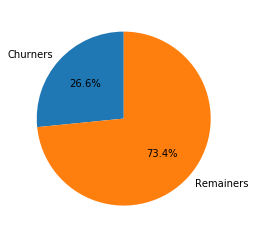

In [30]:
fig1, ax1 = plt.subplots()
ax1.pie([y_train[y_train==1].size, y_train[y_train==0].size], labels=['Churners', 'Remainers'],
        autopct='%1.1f%%', startangle=90)
plt.show()

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7) #set K neighbor as 3
knn.fit(X_train,y_train)
predicted_y = knn.predict(X_test)
print("KNN accuracy according to K=3 is :",knn.score(X_test,y_test))

KNN accuracy according to K=3 is : 0.7635071090047393


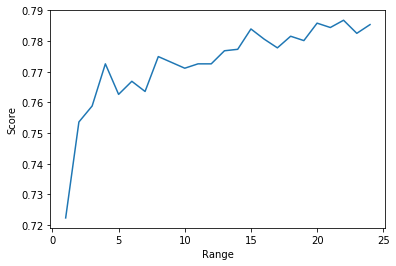

In [39]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [43]:
knn_model = KNeighborsClassifier(n_neighbors = 15) #set K neighbor as 11
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy according to K=11 is :",accuracy_knn)

KNN accuracy according to K=11 is : 0.7838862559241706


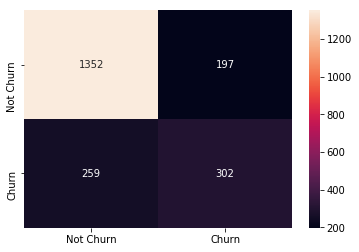

Accuracy of KNN:  78.0
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1549
         1.0       0.61      0.54      0.57       561

   micro avg       0.78      0.78      0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



In [61]:
from sklearn.metrics import confusion_matrix


cnf_matrix = confusion_matrix(y_test, predicted_y, labels=[0,1])
# print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()

from sklearn.metrics import accuracy_score,precision_score
print('Accuracy of KNN: ',round(accuracy_score(y_test,predicted_y)*100))

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, predicted_y))

##  SVM - Grid Search

In [60]:
# from sklearn.model_selection import cross_val_score

# svm = SVC()
# parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
# clf = GridSearchCV(svm, parameters, cv=5)
# clf.fit(X_train,y_train)
# print("Best Parameters:\n", clf.best_params_)
# print("Best Estimators:\n", clf.best_estimator_)

In [57]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
best_model_svm =clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)

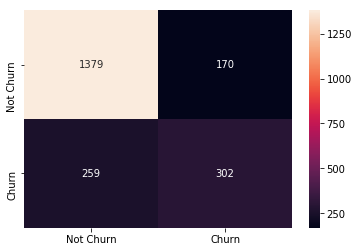

Accuracy of SVM:  80.0
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.54      0.58       561

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.74      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [58]:
from sklearn.metrics import confusion_matrix


cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
# print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()

from sklearn.metrics import accuracy_score,precision_score
print('Accuracy of SVM: ',round(accuracy_score(y_test,yhat)*100))

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, yhat))

## Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
predicted_y = nb_model.predict(X_test)
accuracy_nb = nb_model.score(X_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.7322274881516587


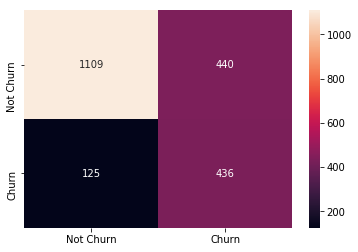

Accuracy of RF:  73.0
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1549
         1.0       0.50      0.78      0.61       561

   micro avg       0.73      0.73      0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.79      0.73      0.75      2110



In [70]:
cnf_matrix = confusion_matrix(y_test, predicted_y, labels=[0,1])
# print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()

from sklearn.metrics import accuracy_score,precision_score
print('Accuracy of RF: ',round(accuracy_score(y_test,predicted_y)*100))


print (classification_report(y_test, predicted_y))